# Importation des packages et importer les données

In [ ]:
#Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [ ]:
# Importation du dataframe

df=pd.read_csv("decathlon.csv")
#Afficher les premières lignes du tableau
df.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [ ]:
#Analyse de la dimension de la base de données
df.shape

(41, 14)

In [ ]:
df1=df.copy()

In [ ]:
var_qual=df[['Competition','Rank','Points']]
var_qual.head()

,Competition,Rank,Points
0,Decastar,1,8217
1,Decastar,2,8122
2,Decastar,3,8099
3,Decastar,4,8067
4,Decastar,5,8036


In [ ]:
# Analyse du type de variable dans la base de données

df.drop(columns=['Competition','Rank','Points'],inplace=True)

In [ ]:
# Analyse de données manquantes

df.isnull().sum()

,0
Athlets,0
100m,0
Long.jump,0
Shot.put,0
High.jump,0
400m,0
110m.hurdle,0
Discus,0
Pole.vault,0
Javeline,0


In [ ]:
df["Athlets"].nunique()- int(df.shape[0])

0

# Analyses descriptives univariées

In [ ]:
df.set_index('Athlets',drop=True,inplace=True)

In [ ]:
# Analyse desciptive du jeu de données
df.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000


<Axes: >

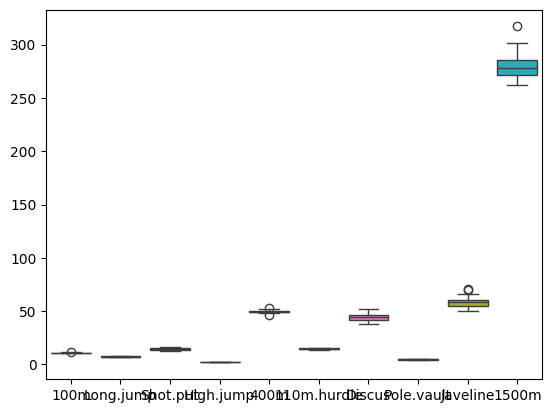

In [ ]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df)

<Axes: xlabel='Competition', ylabel='count'>

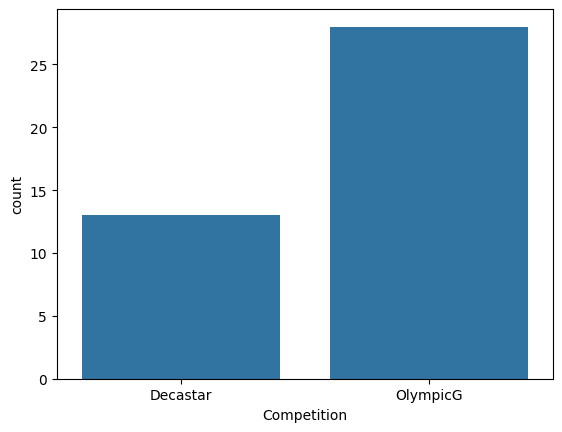

In [ ]:
# Analyse de la variable qualitative

sns.countplot(x=var_qual['Competition'])

([<matplotlib.patches.Wedge at 0x7cd5186b2d40>,
 [Text(-0.5979243176519438, 0.923301960552699, 'OlympicG'),
  Text(0.5979243176519436, -0.9233019605526991, 'Decastar')])

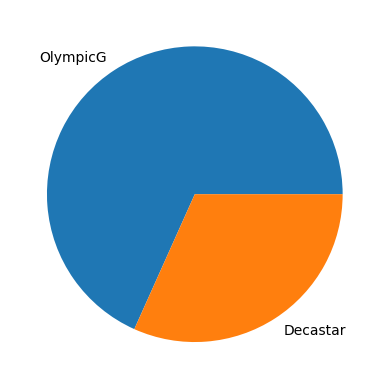

In [ ]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (var_qual['Competition'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

# Analyse bivariées

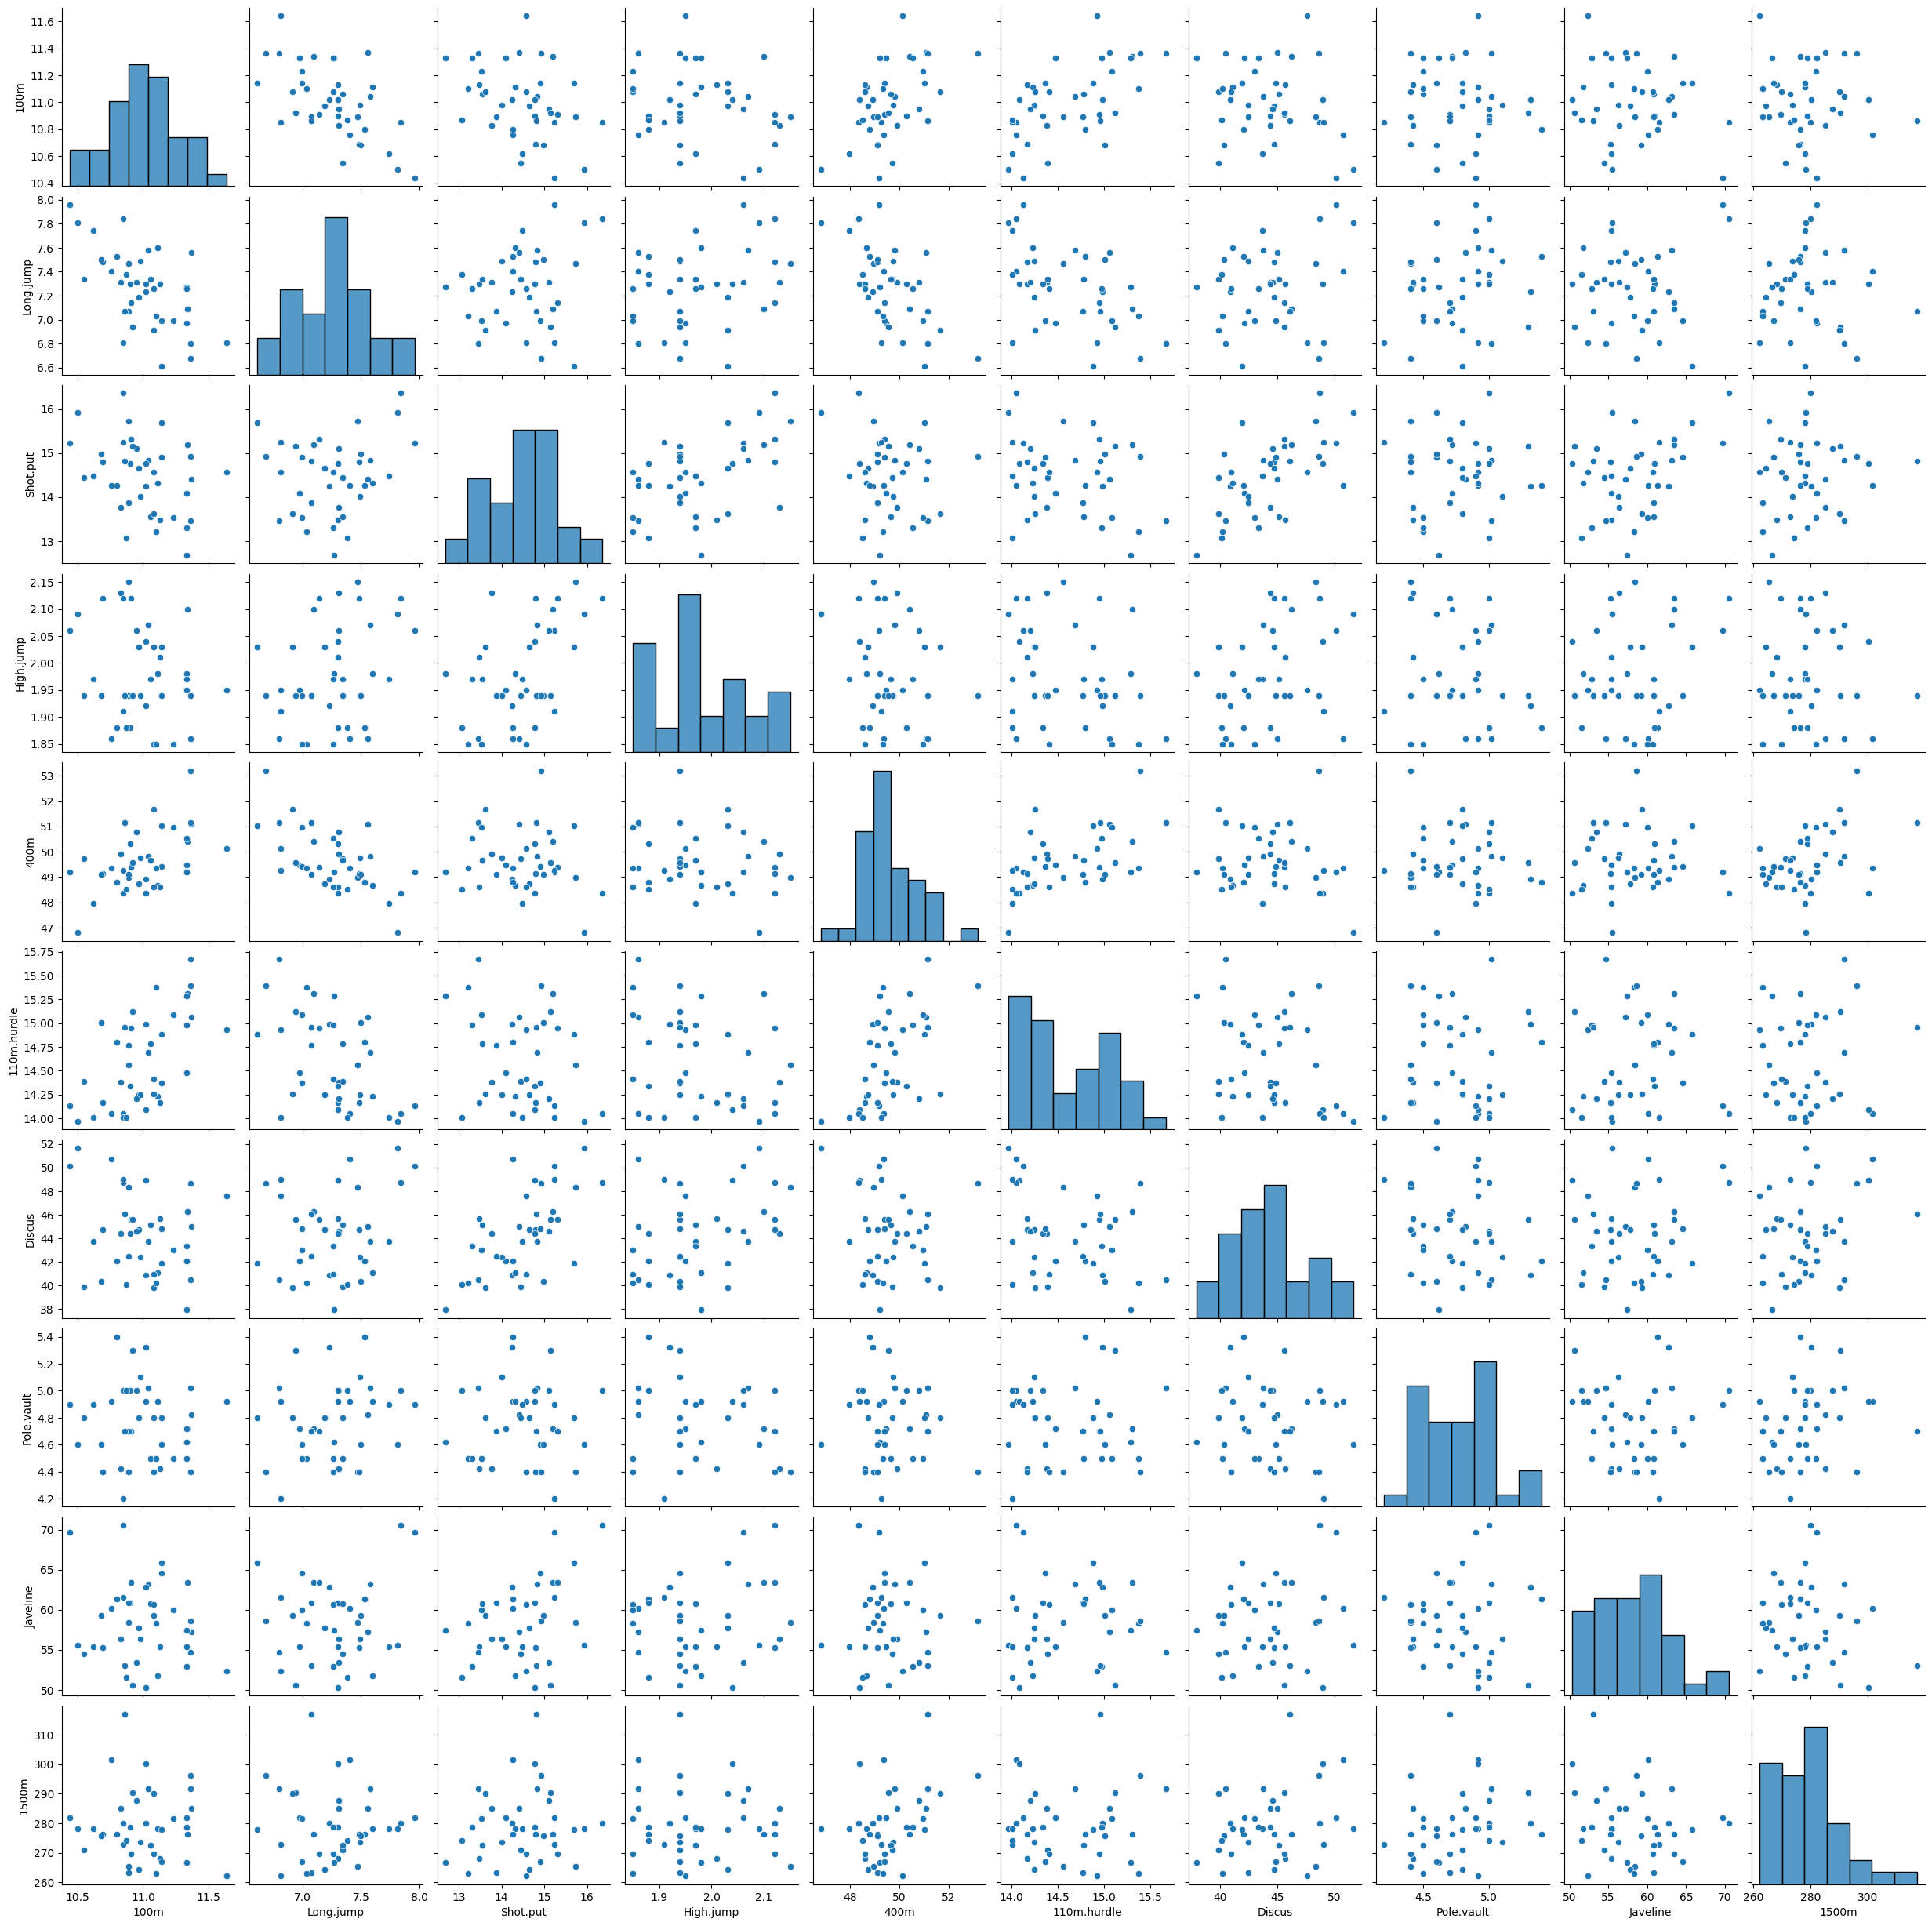

In [ ]:
# Relation entre les variables quantitatives

sns.pairplot(df)

<Axes: >

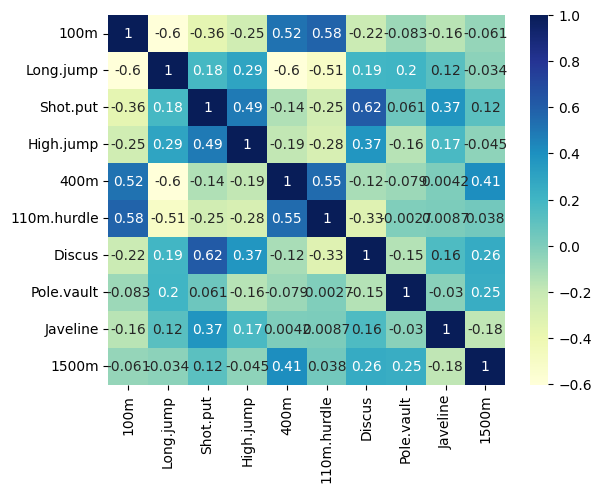

In [ ]:
# Obtenir le tableau de corélation et la heatmap

corr_matrix = df.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")



# Analyse multivariée avec l'ACP

## Construction de l'ACP

In [ ]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
# Réduction de dimension
pca = PCA()
df_pca=pca.fit_transform(df_scaled)

## Aide à l'interprétation

### Choix du nombre d'axe

In [ ]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,3.353703,33.0,33.0
1,Dim2,1.780559,17.0,50.0
2,Dim3,1.440040,14.0,64.0
3,Dim4,1.083272,11.0,75.0
4,Dim5,0.701893,7.0,82.0
5,Dim6,0.614250,6.0,88.0
6,Dim7,0.462516,5.0,92.0
7,Dim8,0.406799,4.0,96.0
8,Dim9,0.220185,2.0,98.0
9,Dim10,0.186783,2.0,100.0


<ipython-input-61-a6933117189d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
<ipython-input-61-a6933117189d>:2: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(0.5, 0.98, 'Variance expliquée par dimension')

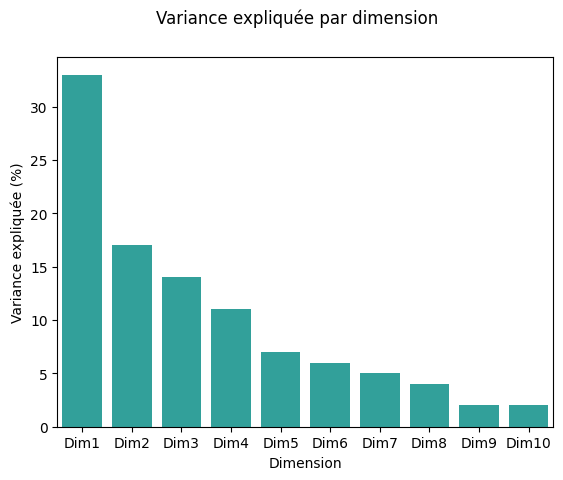

In [ ]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")



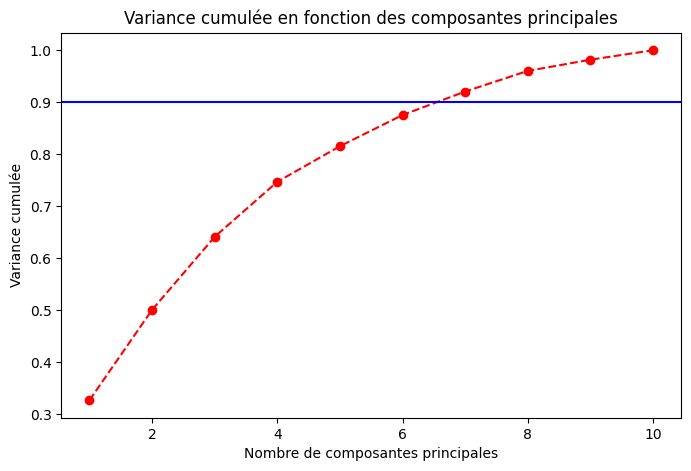

' 5 composantes principales suffisent pour expliquer 90% de la variance'

In [ ]:


cumulative_variance = pca.explained_variance_ratio_.cumsum()

num_components_90 = (cumulative_variance >= 0.90).argmax() + 1


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.axhline(y=0.90, color='b', linestyle='-')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée')
plt.title('Variance cumulée en fonction des composantes principales')
plt.show()

num_components_90
""" 7 composantes principales suffisent pour expliquer 90% de la variance"""

### Autres aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [ ]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(df.shape[1])])
df_cos_squared.index = df.columns

print(df_cos_squared)

                  PC1       PC2       PC3       PC4       PC5       PC6  \
100m         0.183438  0.168225  0.118435  0.099979  0.141162  0.170201   
Long.jump    0.020161  0.068686  0.206068  0.070637  0.186664  0.030134   
Shot.put     0.024205  0.023632  0.000389  0.047936  0.012303  0.006108   
High.jump    0.001353  0.009803  0.034371  0.017397  0.000812  0.080033   
400m         0.133362  0.001965  0.018042  0.450533  0.011230  0.039431   
110m.hurdle  0.087662  0.093712  0.093314  0.218810  0.110571  0.009928   
Discus       0.145753  0.393999  0.095930  0.008363  0.015481  0.127685   
Pole.vault   0.213077  0.000441  0.098552  0.015648  0.045539  0.505684   
Javeline     0.010974  0.232969  0.182577  0.059370  0.304847  0.022540   
1500m        0.180016  0.006568  0.152322  0.011327  0.171392  0.008256   

                  PC7       PC8       PC9      PC10  
100m         0.093285  0.000775  0.023470  0.001031  
Long.jump    0.211622  0.018725  0.057844  0.129460  
Shot.put    

In [ ]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = df.shape[1]
feature_names=df.columns[0:10]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

             PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
100m            0.615196     0.035898     0.034856     0.001466     0.093606   
Long.jump       0.564176     0.122299     0.034031     0.010619     0.001379   
Shot.put        0.397197     0.366916     0.000560     0.037233     0.012663   
High.jump       0.335299     0.125773     0.069030     0.018845     0.316226   
400m            0.473416     0.332366     0.017716     0.000880     0.007882   
110m.hurdle     0.570804     0.053655     0.008796     0.086697     0.027676   
Discus          0.312850     0.376806     0.001891     0.069115     0.011263   
Pole.vault      0.002598     0.033342     0.490490     0.311794     0.111595   
Javeline        0.078710     0.102994     0.155627     0.520022     0.095431   
1500m           0.003457     0.230510     0.627041     0.026598     0.024171   

             PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  
100m            0.053846     0.067413  

In [ ]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

             PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
100m           18.343770     2.016090     2.420499     0.135329    13.336184   
Long.jump      16.822467     6.868559     2.363191     0.980301     0.196456   
Shot.put       11.843540    20.606785     0.038903     3.437115     1.804174   
High.jump       9.997887     7.063694     4.793625     1.739678    45.053306   
400m           14.116229    18.666374     1.230271     0.081242     1.122971   
110m.hurdle    17.020115     3.013382     0.610832     8.003279     3.943110   
Discus          9.328486    21.162245     0.131317     6.380208     1.604724   
Pole.vault      0.077455     1.872547    34.060900    28.782667    15.899147   
Javeline        2.346963     5.784369    10.807142    48.004802    13.596270   
1500m           0.103088    12.945954    43.543320     2.455379     3.443657   

             PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  
100m            8.766182    14.575298  

#### Qualité de représentation des individus et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des individus (cosinus carré)**

La qualité de représentation des individus est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les individus et les axes principaux. Le cosinus carré est également appelé **cos²**. Pour un individu donné, la somme des cos² sur tous les axes principaux est égale à 1.

La formule pour calculer le cos² pour un individu `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$

où $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`.

Un seuil couramment utilisé pour interpréter la qualité de représentation des individus est 0,5. Si le cos² d'un individu est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien l'individu.

**Contribution des individus à la formation des axes (CTR)**

La contribution des individus à la formation des axes indique l'importance relative de chaque individu pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$

où :
- $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`
- $n$ est le nombre total d'individus
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`

Il est important de noter que la somme des contributions des individus sur un axe principal donné est égale à 100 %.

En interprétant les contributions des individus à la formation des axes, **il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré**.

In [ ]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (df_pca**2) / (df_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

    PC1_contrib  PC2_contrib   PC3_contrib  PC4_contrib  PC5_contrib  \
0      0.455757     0.815562  1.157940e+00     3.106555     1.737719   
1      1.109223     0.452228  7.765604e+00     0.283502    13.548493   
2      1.341617     0.320913  6.481775e+00     7.760326     2.197425   
3      0.270185     1.047869  1.341417e+00    11.102590     0.454453   
4      0.249712     6.220251  2.542290e+00     1.718238     5.441470   
5      0.092632     3.888993  9.952364e-01     0.781913     3.486481   
6      0.053717     1.638763  2.787004e+00     5.920349     0.006750   
7      0.251033     0.072923  2.954141e-01     5.230959     0.219831   
8      2.895568     0.431101  9.024515e-01     0.661887     8.655194   
9      1.738415     0.326724  1.197326e+00     0.246971     0.191870   
10     1.309097     0.132414  2.297914e-07     0.937431     0.347624   
11     3.999148     5.296542  3.025294e+00     0.085881     2.395189   
12    11.514592     0.054716  2.980207e+00     0.619045     0.29

# Représentation graphique et interprétation

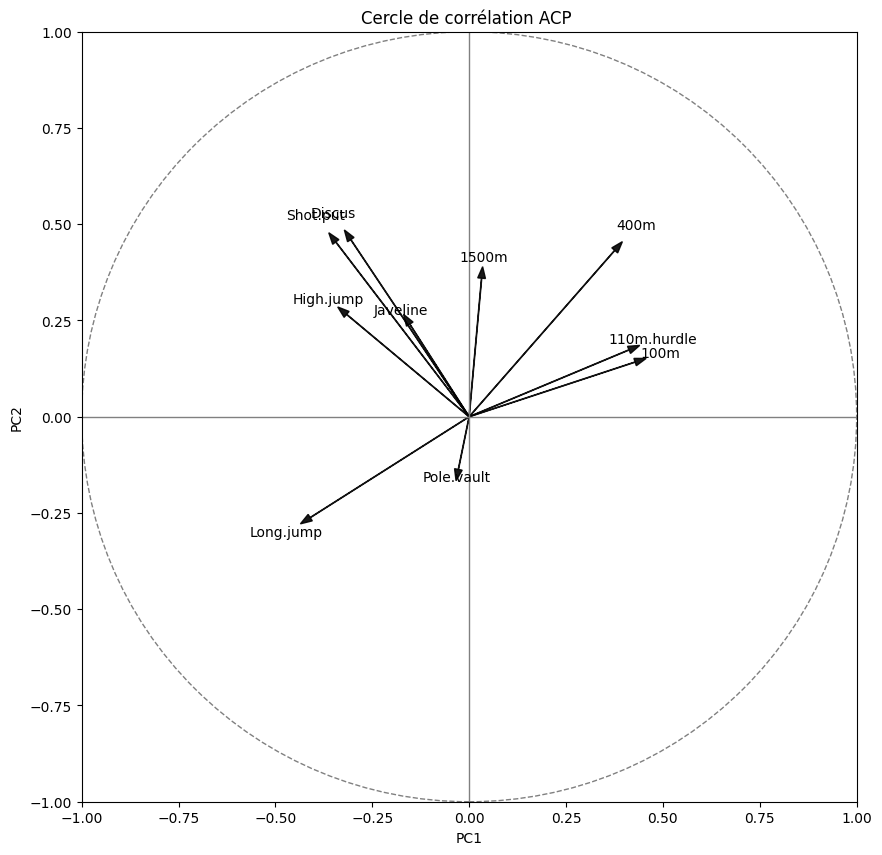

In [ ]:


# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')
# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)
# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()


In [ ]:
Athlets_names = df1['Athlets']

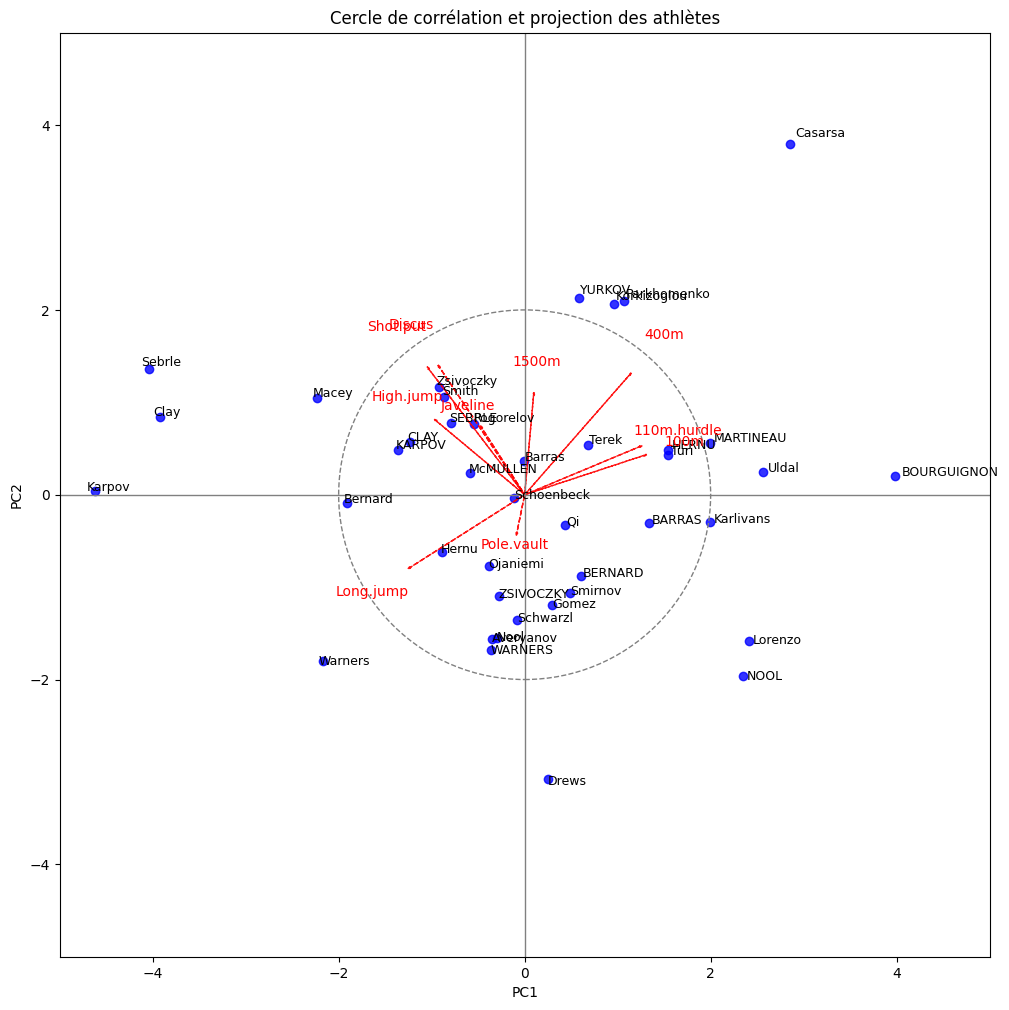

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Supposons que les colonnes de performance soient les colonnes nécessaires pour l'ACP
athlete_names = df1['Athlets']
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les points des athlètes avec les couleurs et étiquettes
for i, (x, y) in enumerate(df_pca):
    plt.scatter(x, y, color='b', alpha=.8)
    plt.text(x * 1.02, y * 1.02, athlete_names.iloc[i], fontsize=9, color='black')

# Ajouter les vecteurs des variables (cercles de corrélation)
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0]* 3, coeff[i, 1]* 3, color='r', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 4, coeff[i, 1] * 4, df.columns[i], color='r', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 2, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation et projection des athlètes')

# Afficher la figure
plt.show()


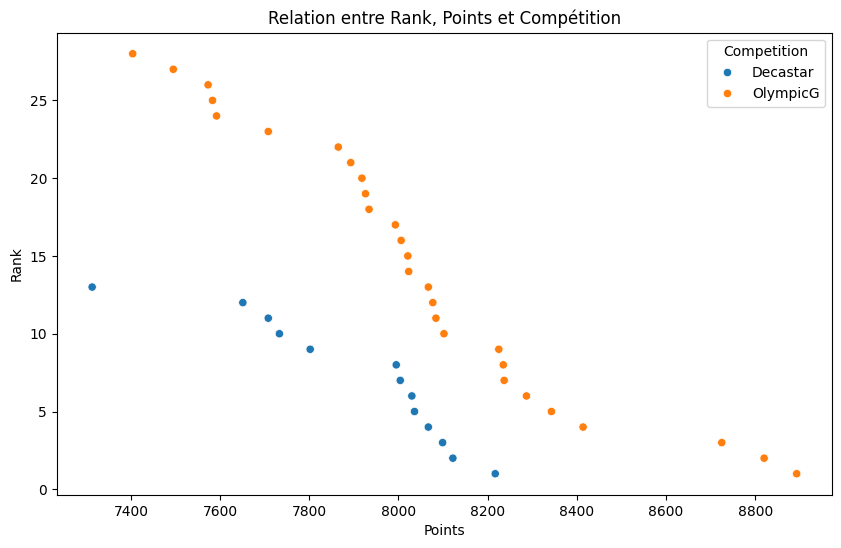

In [ ]:
# Graphique de dispersion pour la relation rank-points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Points', y='Rank', hue='Competition')
plt.title('Relation entre Rank, Points et Compétition')
plt.xlabel('Points')
plt.ylabel('Rank')
plt.show()

In [ ]:
# Identifier le gagnant (athlète avec le plus de points) pour chaque compétition
gagnants = df1.loc[df1.groupby('Competition')['Points'].idxmax()]

print("Profils des gagnants par compétition :")
print(gagnants[['Rank', 'Points', 'Competition']])


Profils des gagnants par compétition :
    Rank  Points Competition
0      1    8217    Decastar
13     1    8893    OlympicG


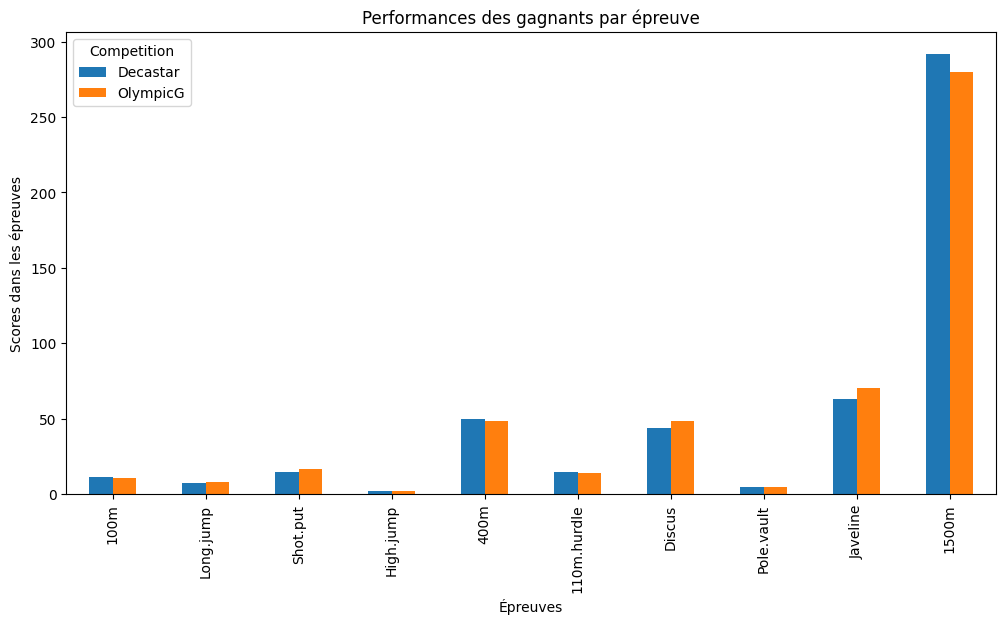

In [ ]:
caracteristiques_gagnants = gagnants[[col for col in df.columns] + ['Competition']] # this will now include the 'Competition' column

# Créer un graphique pour comparer les performances des gagnants
caracteristiques_gagnants.set_index('Competition', inplace=True)
caracteristiques_gagnants.T.plot(kind='bar', figsize=(12, 6))
plt.title("Performances des gagnants par épreuve")
plt.ylabel("Scores dans les épreuves")
plt.xlabel("Épreuves")
plt.show()

Comparaison des moyennes des gagnants par épreuve :
100m            10.945
Long.jump        7.710
Shot.put        15.595
High.jump        2.095
400m            49.085
110m.hurdle     14.370
Discus          46.235
Pole.vault       5.010
Javeline        66.855
1500m          285.855
dtype: float64


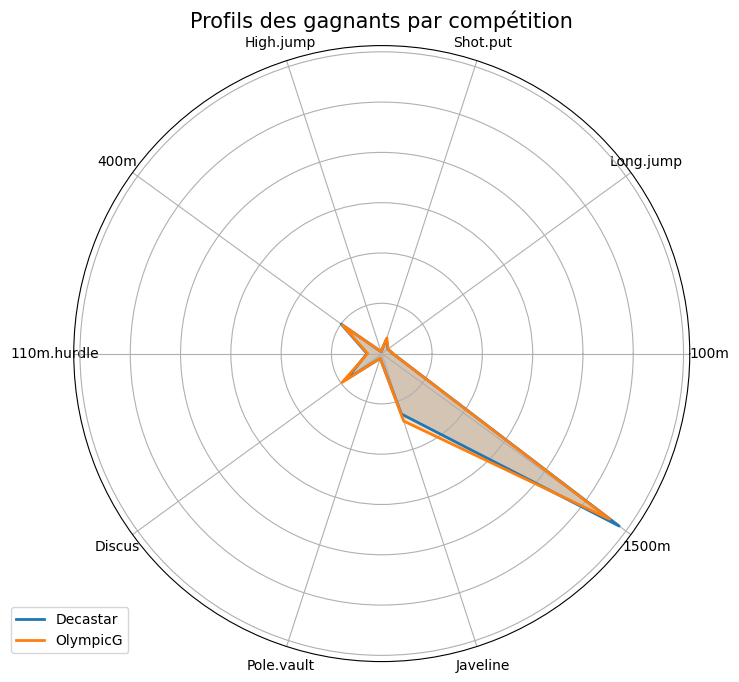

In [ ]:
print("Comparaison des moyennes des gagnants par épreuve :")
print(caracteristiques_gagnants.mean())

# Afficher un graphique radar pour visualiser les profils des gagnants
import numpy as np

# Préparer les données pour un graphique radar
categories = list(caracteristiques_gagnants.columns)
N = len(categories)

# Angles pour chaque catégorie
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Répéter les angles pour fermer le graphique
angles += angles[:1]

# Création de la figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer pour chaque compétition
for index, row in caracteristiques_gagnants.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=index)
    ax.fill(angles, values, alpha=0.25)

# Ajouter les étiquettes
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Ajouter une légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Titre
plt.title("Profils des gagnants par compétition", size=15, color='black')

plt.show()